In [1]:
import helper_functions

In [2]:
import pandas as pd
from scipy.stats import fisher_exact
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [3]:

def preprocess(raw_W):
    W = raw_W.copy()
    to_remove = []
    for col in W.columns:
        if col == 'other' or col == 'other ':
            to_remove.append(col)
        if 'Unnamed' in col:
            to_remove.append(col)
    W = W.drop(columns=to_remove)
    W = W.rename(columns={"vc3": "vc3l", 'vm7':'vm7d', '1':'vm7v'})
    W = W.sort_index(axis='columns')
    W = W.replace(np.nan, int(0))
    W = W > 0
    W = W.astype(int)
    return W

In [5]:
W_Ellis_Mel_F = pd.read_csv('../Data/Ellis_raw_D_Mel_Female.csv')
W_Ellis_Mel_F_ab = preprocess(W_Ellis_Mel_F[W_Ellis_Mel_F['Unnamed: 2'] == 'alpha/beta'])
W_Ellis_Mel_F_abp = preprocess(W_Ellis_Mel_F[W_Ellis_Mel_F['Unnamed: 2'] == 'alpha\'/beta\''])
W_Ellis_Mel_F_gamma = preprocess(W_Ellis_Mel_F[W_Ellis_Mel_F['Unnamed: 2'] == 'gamma'])
W_Ellis_Mel_F = preprocess(W_Ellis_Mel_F)


W_Ellis_Mel_M = pd.read_csv('../Data/Ellis_raw_D_Mel_Male.csv')
W_Ellis_Mel_M_ab = preprocess(W_Ellis_Mel_M[W_Ellis_Mel_M['Unnamed: 2'] == 'alpha/beta'])
W_Ellis_Mel_M_abp = preprocess(W_Ellis_Mel_M[W_Ellis_Mel_M['Unnamed: 2'] == 'alpha\'/beta\''])
W_Ellis_Mel_M_gamma = preprocess(W_Ellis_Mel_M[W_Ellis_Mel_M['Unnamed: 2'] == 'gamma'])
W_Ellis_Mel_M = preprocess(W_Ellis_Mel_M)

W_Ellis_Sech = pd.read_csv('../Data/Ellis_raw_D_Sech.csv')
W_Ellis_Sech_ab = preprocess(W_Ellis_Sech[W_Ellis_Sech['Unnamed: 2'] == 'alpha/beta'])
W_Ellis_Sech_abp = preprocess(W_Ellis_Sech[W_Ellis_Sech['Unnamed: 2'] == 'alpha\'/beta\''])
W_Ellis_Sech_gamma = preprocess(W_Ellis_Sech[W_Ellis_Sech['Unnamed: 2'] == 'gamma'])
W_Ellis_Sech = preprocess(W_Ellis_Sech)

W_Ellis_Sim = pd.read_csv('../Data/Ellis_raw_D_Sim.csv')
W_Ellis_Sim_ab = preprocess(W_Ellis_Sim[W_Ellis_Sim['Unnamed: 2'] == 'alpha beta'])
W_Ellis_Sim_abp = preprocess(W_Ellis_Sim[W_Ellis_Sim['Unnamed: 2'] == 'alpha\' beta\''])
W_Ellis_Sim_gamma = preprocess(W_Ellis_Sim[W_Ellis_Sim['Unnamed: 2'] == 'gamma'])
W_Ellis_Sim = preprocess(W_Ellis_Sim)


In [6]:
W_Ellis_Sim_shuff = helper_functions.shuffle(W_Ellis_Sim, W_Ellis_Sim)
W_Ellis_Sim_shuff = pd.DataFrame(W_Ellis_Sim_shuff, columns = W_Ellis_Sim.columns)
W_Ellis_Sim_fixed = helper_functions.fixed(W_Ellis_Sim, W_Ellis_Sim)
W_Ellis_Sim_fixed = pd.DataFrame(W_Ellis_Sim_fixed, columns = W_Ellis_Sim.columns)

W_Ellis_Sech_shuff = helper_functions.shuffle(W_Ellis_Sech, W_Ellis_Sech)
W_Ellis_Sech_shuff = pd.DataFrame(W_Ellis_Sech_shuff, columns = W_Ellis_Sech.columns)
W_Ellis_Sech_fixed = helper_functions.fixed(W_Ellis_Sech, W_Ellis_Sech)
W_Ellis_Sech_fixed = pd.DataFrame(W_Ellis_Sech_fixed, columns = W_Ellis_Sech.columns)

W_Ellis_Mel_M_shuff = helper_functions.shuffle(W_Ellis_Mel_M, W_Ellis_Mel_M)
W_Ellis_Mel_M_shuff = pd.DataFrame(W_Ellis_Mel_M_shuff, columns = W_Ellis_Mel_M.columns)
W_Ellis_Mel_M_fixed = helper_functions.fixed(W_Ellis_Mel_M, W_Ellis_Mel_M)
W_Ellis_Mel_M_fixed = pd.DataFrame(W_Ellis_Mel_M_fixed, columns = W_Ellis_Mel_M.columns)

W_Ellis_Mel_F_shuff = helper_functions.shuffle(W_Ellis_Mel_F, W_Ellis_Mel_F)
W_Ellis_Mel_F_shuff = pd.DataFrame(W_Ellis_Mel_F_shuff, columns = W_Ellis_Mel_F.columns)
W_Ellis_Mel_F_fixed = helper_functions.fixed(W_Ellis_Mel_F, W_Ellis_Mel_F)
W_Ellis_Mel_F_fixed = pd.DataFrame(W_Ellis_Mel_F_fixed, columns = W_Ellis_Mel_F.columns)


0
1
2
3
4
5
6
7
8
9
10
Ellis Sim shuffle vs. Ellis Sech fixed dl6 p-value 6.683580706753578e-08
Ellis Sim vs. Ellis Sech shuffle dc3 p-value 1.782757357130303e-07
Ellis Sim shuffle vs. Ellis Sim fixed dl6 p-value 2.5975967583246735e-07
Ellis Mel Male vs. Ellis Sim shuffle dl6 p-value 2.5975967583246735e-07
Ellis Sim vs. Ellis Sim shuffle dl6 p-value 2.5975967583246735e-07
Ellis Sim shuffle vs. Ellis Mel Female fixed dl6 p-value 2.5975967583246735e-07
Ellis Sim shuffle vs. Ellis Mel Male fixed dl6 p-value 2.5975967583246735e-07
Ellis Sech vs. Ellis Sim shuffle dl6 p-value 9.90830479869892e-07
Ellis Sim vs. Ellis Sech fixed vm5v p-value 1.1309251135454805e-06
Ellis Mel Male vs. Ellis Sim shuffle vm7v p-value 1.160403399018077e-06
Ellis Sim shuffle vs. Ellis Sim fixed vm7v p-value 1.160403399018077e-06
Ellis Sim shuffle vs. Ellis Mel Male fixed vm7v p-value 1.160403399018077e-06
Ellis Sim vs. Ellis Sech fixed dc3 p-value 2.0955386481061507e-06
Ellis Mel Female shuffle vs. Ellis Mel Male f

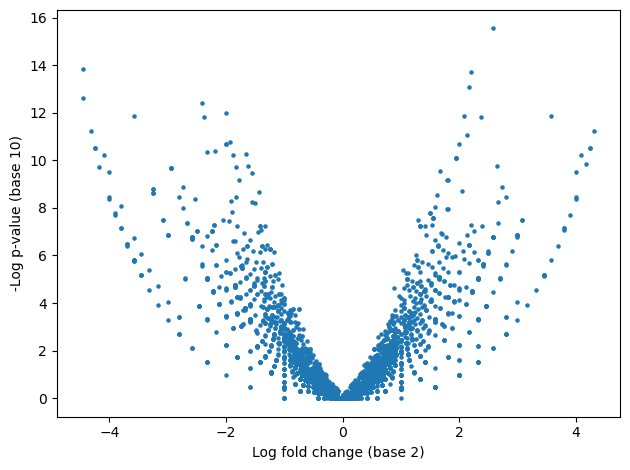

<Figure size 640x480 with 0 Axes>

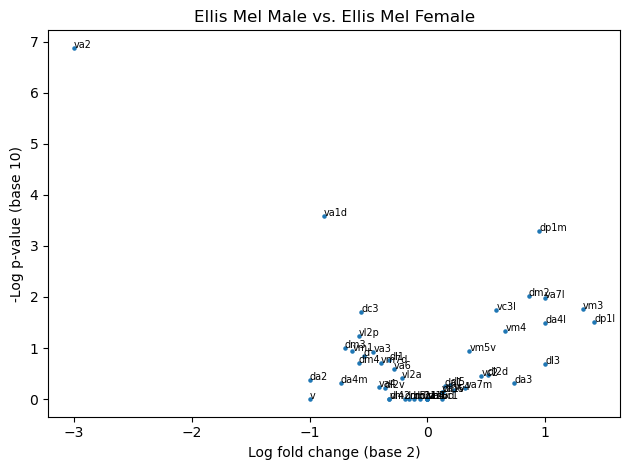

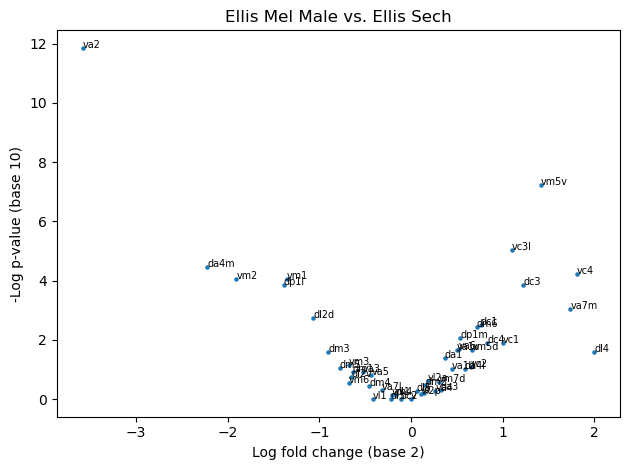

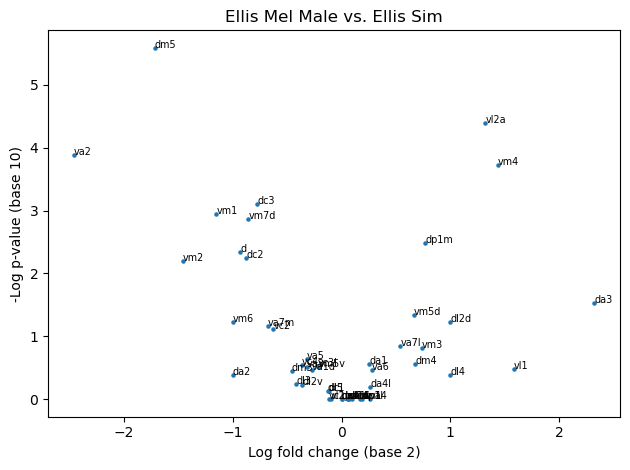

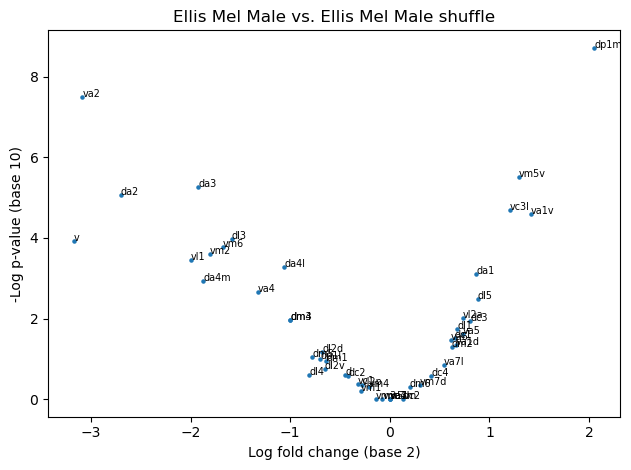

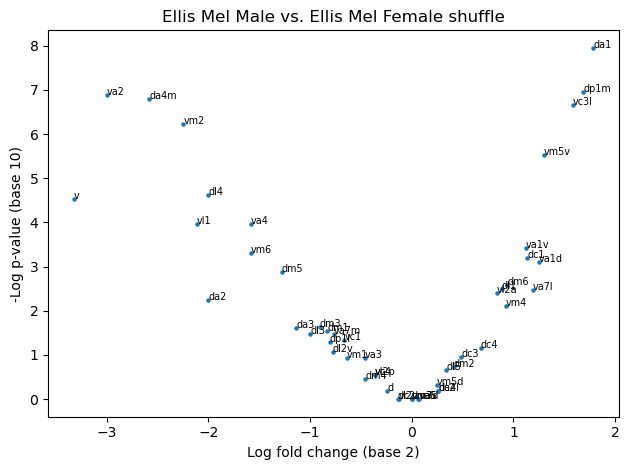

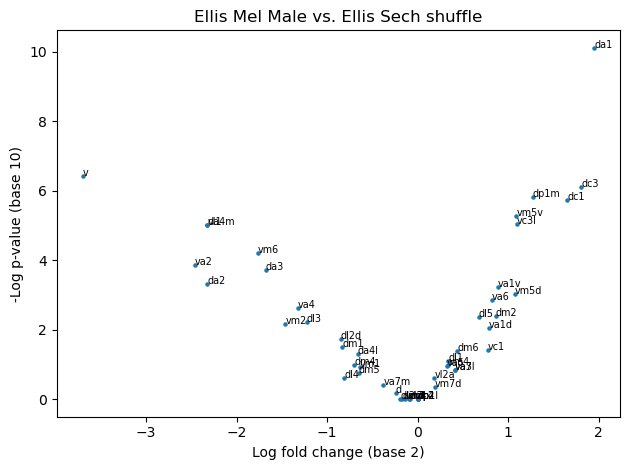

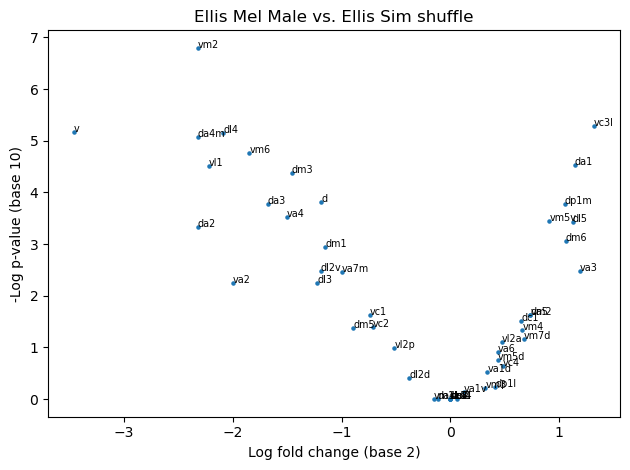

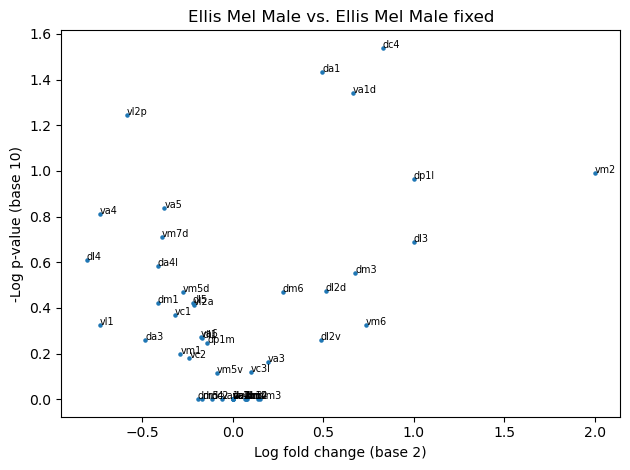

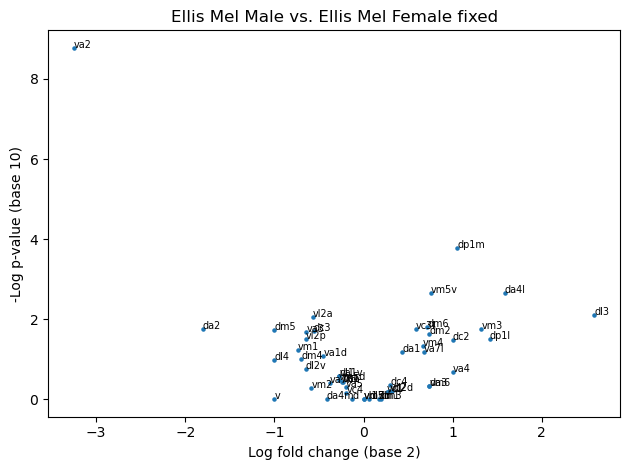

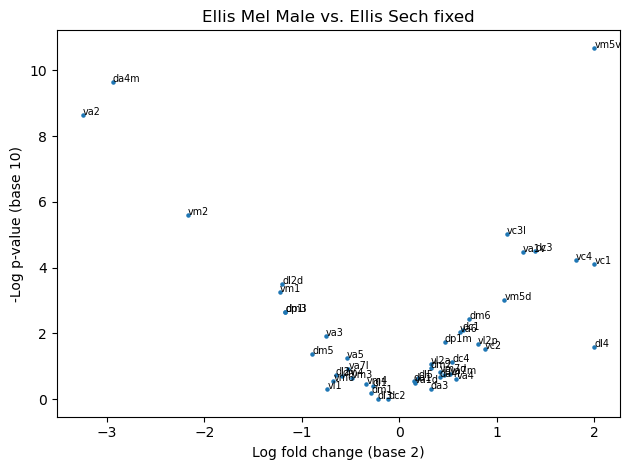

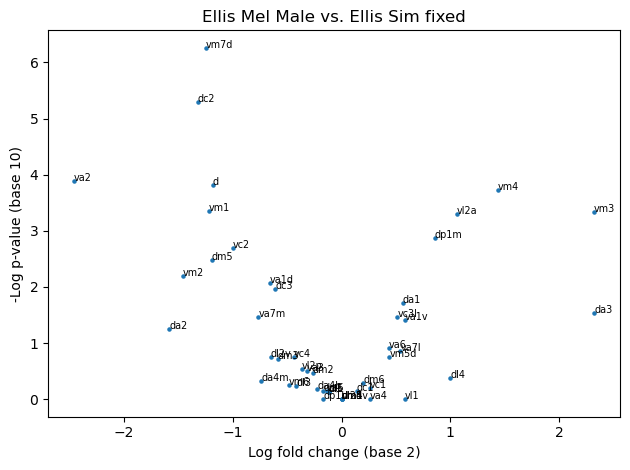

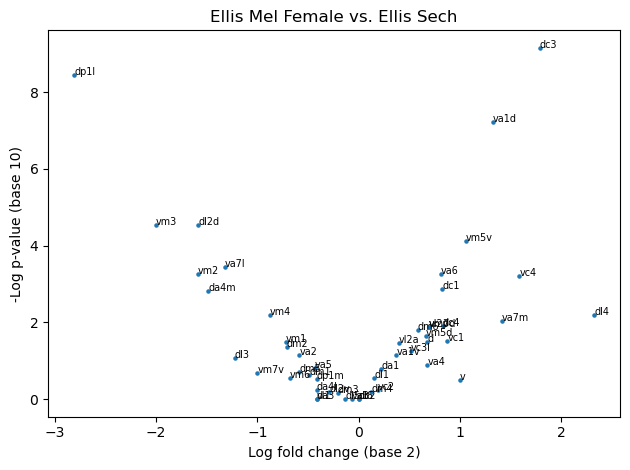

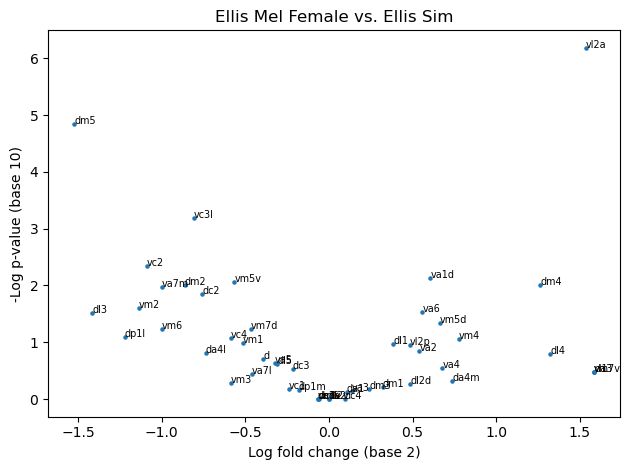

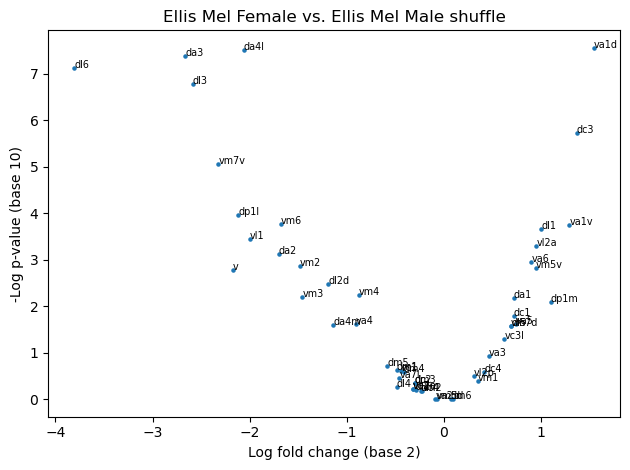

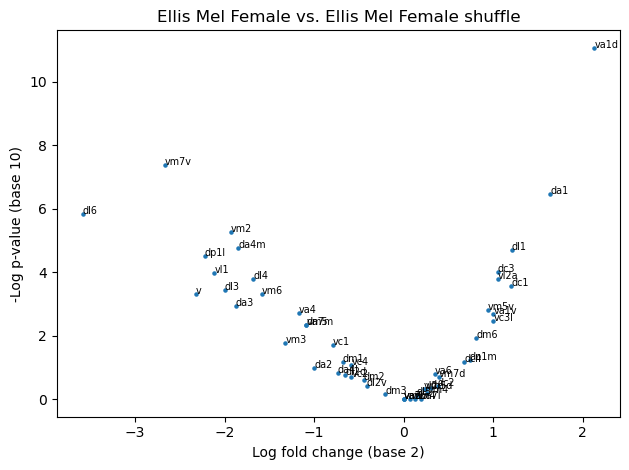

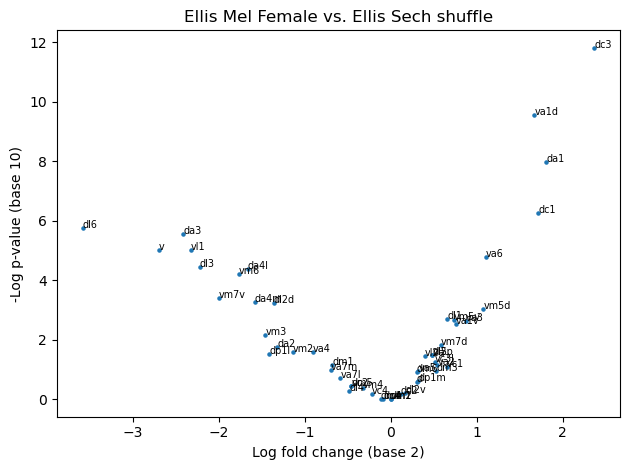

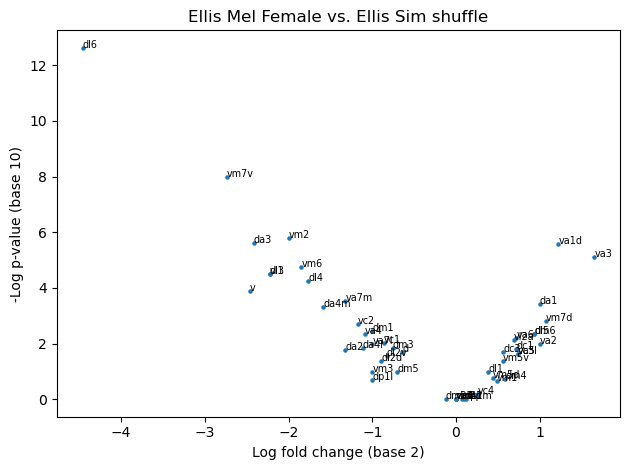

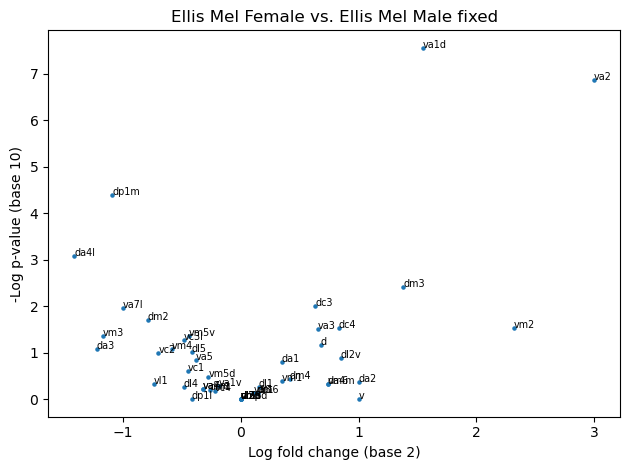

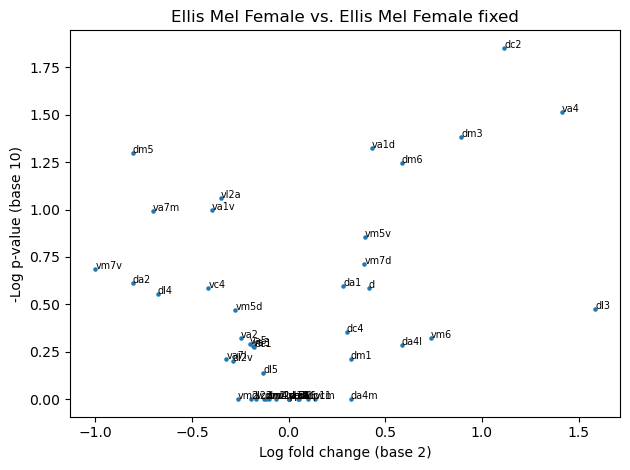

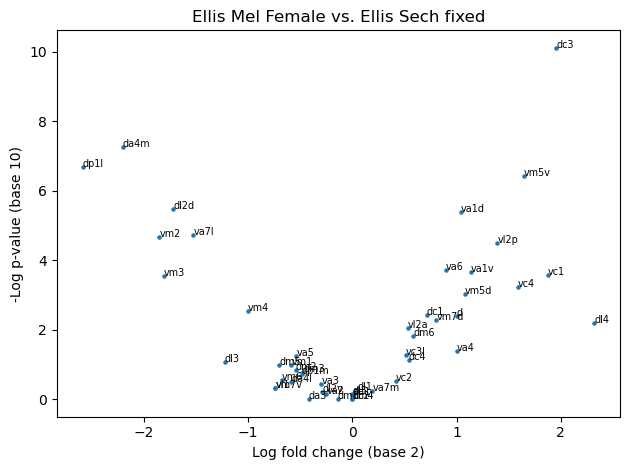

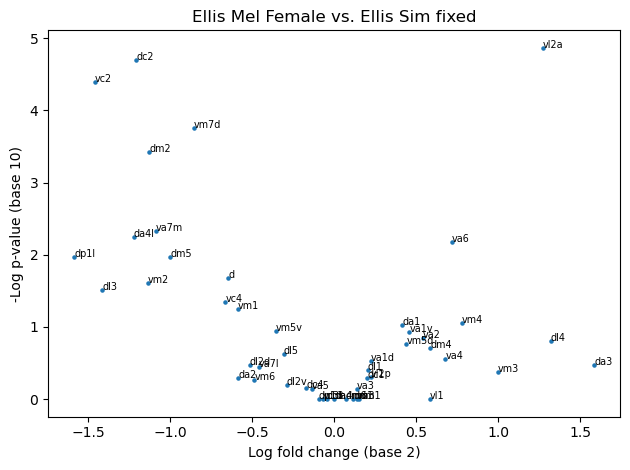

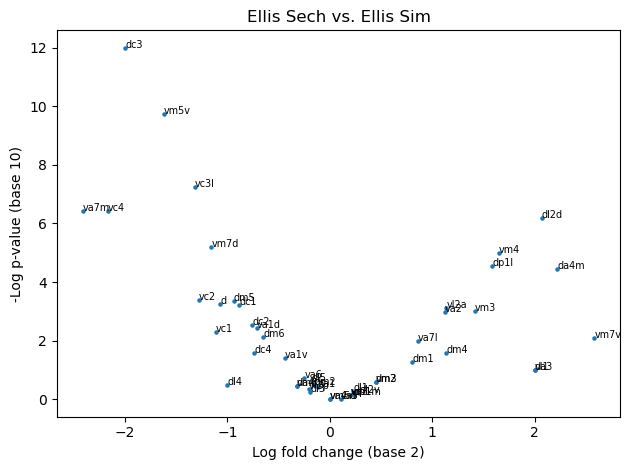

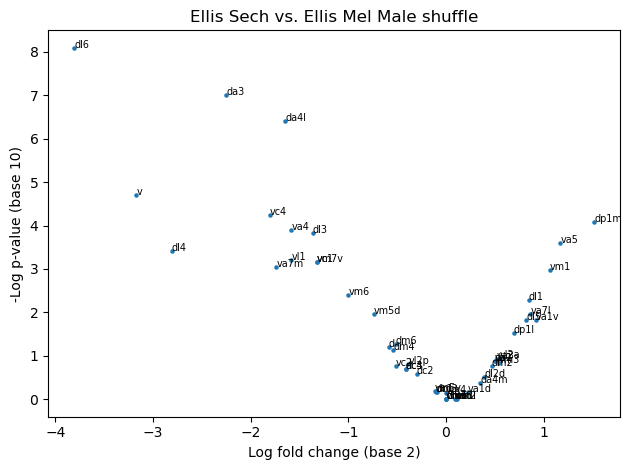

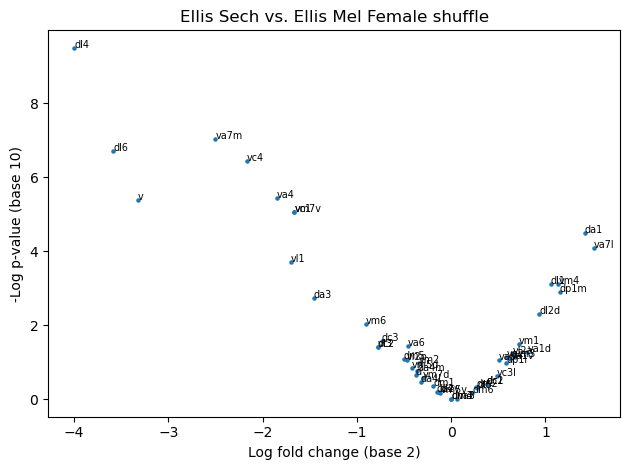

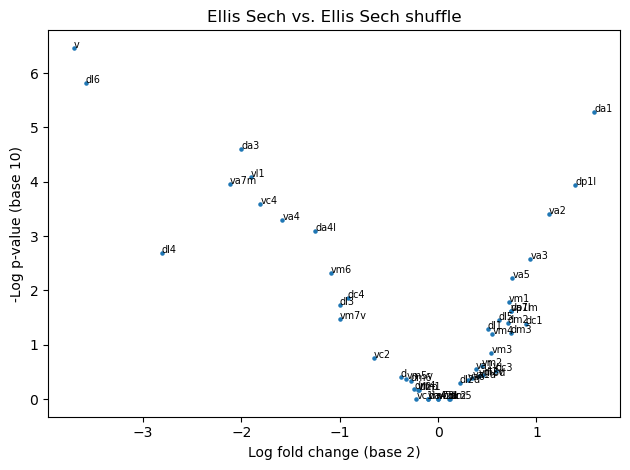

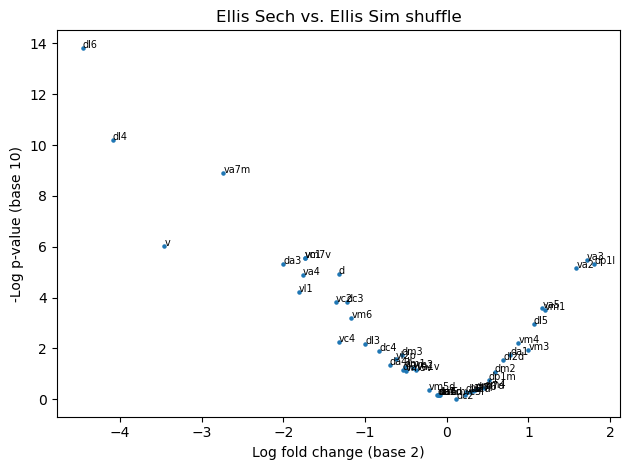

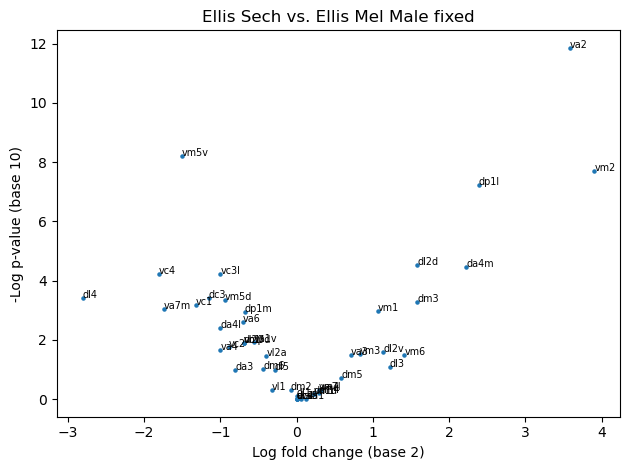

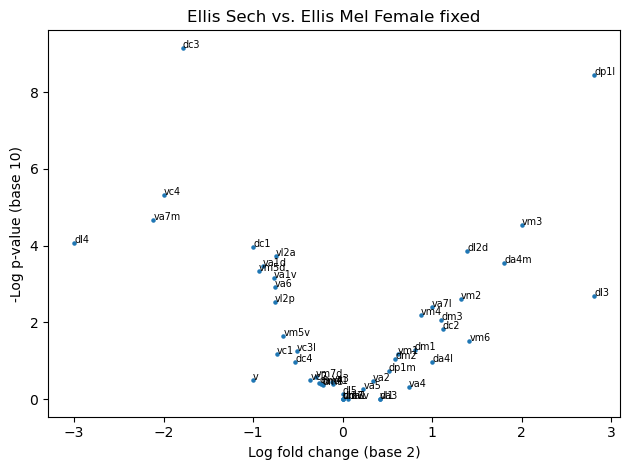

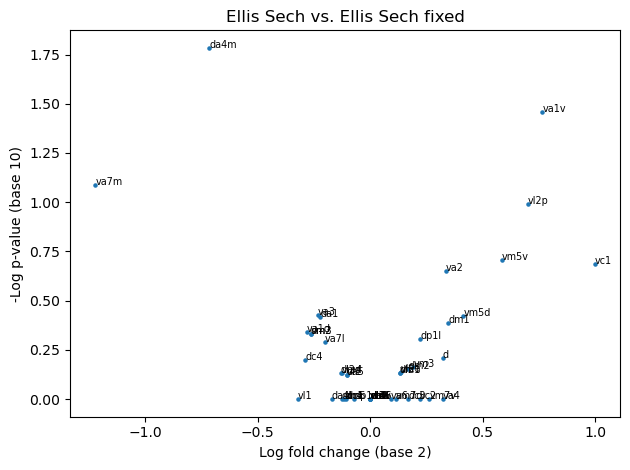

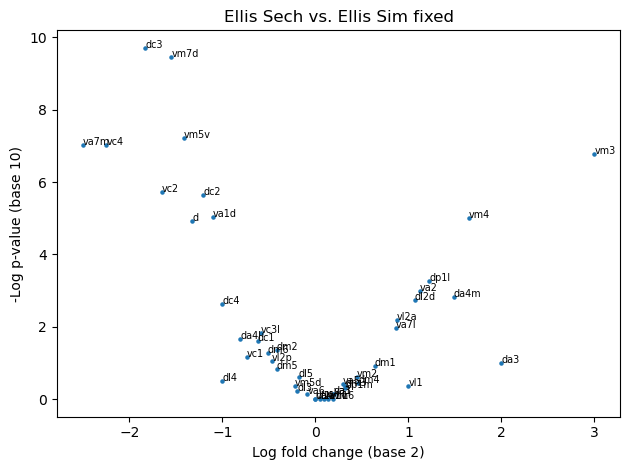

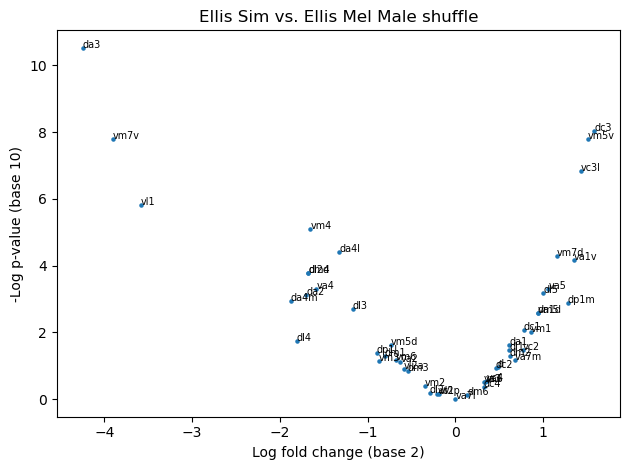

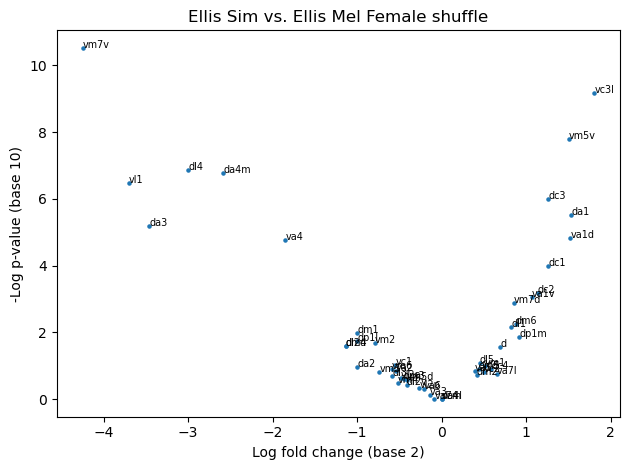

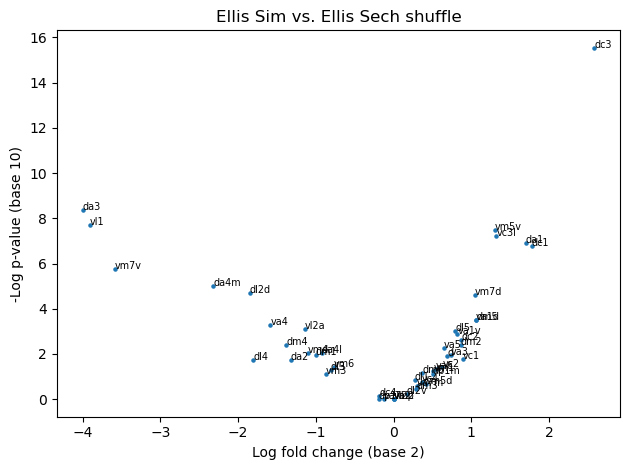

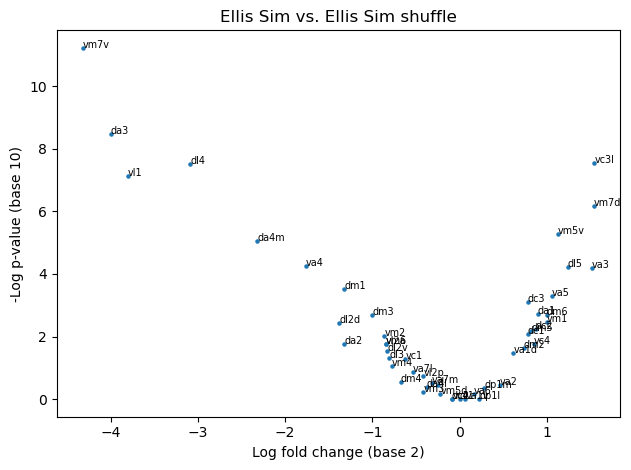

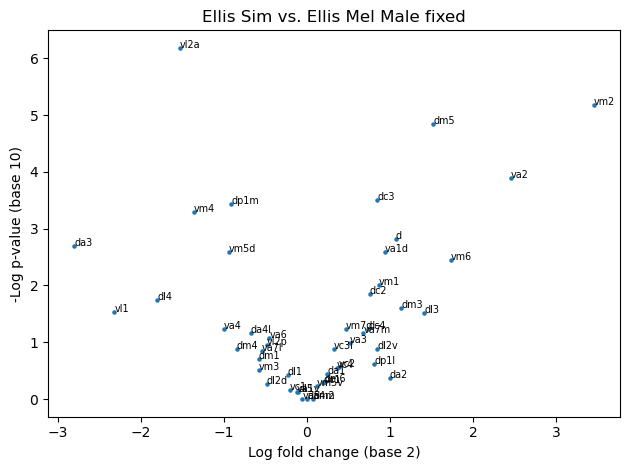

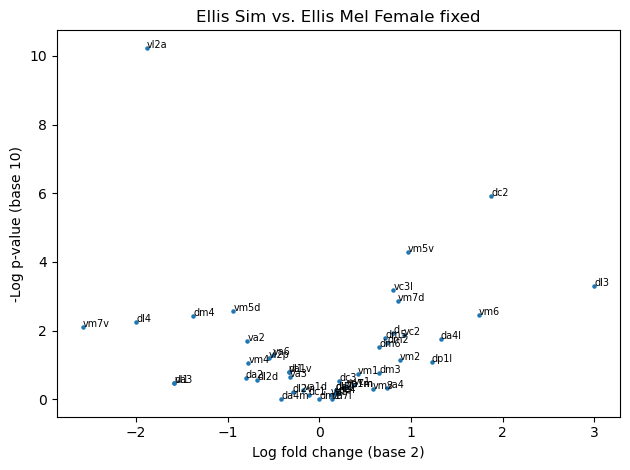

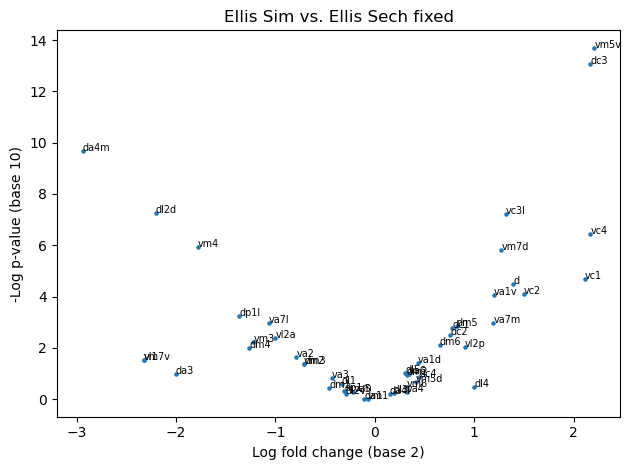

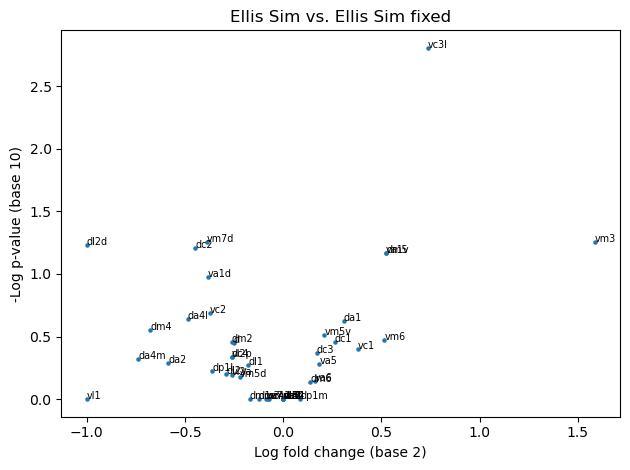

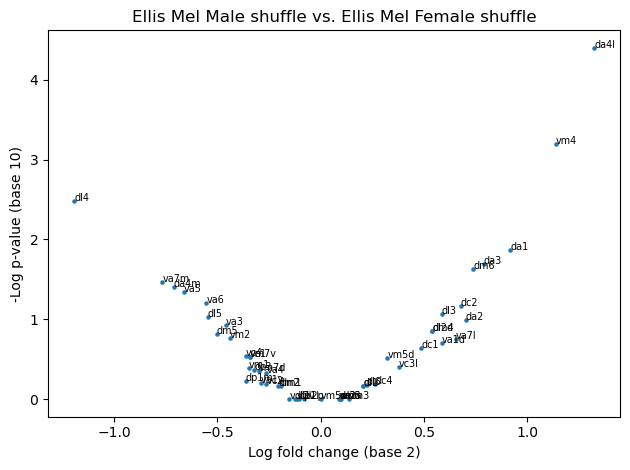

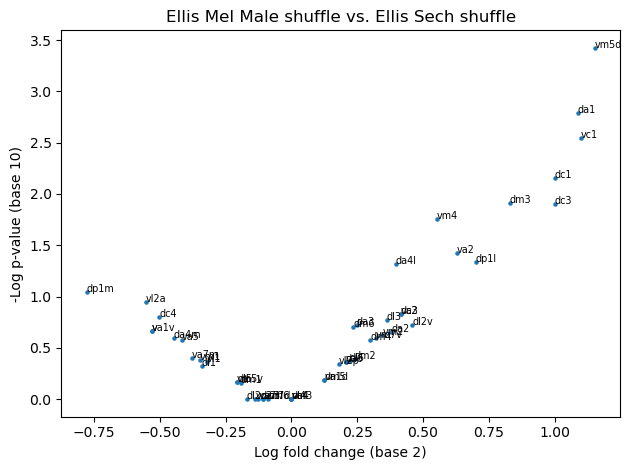

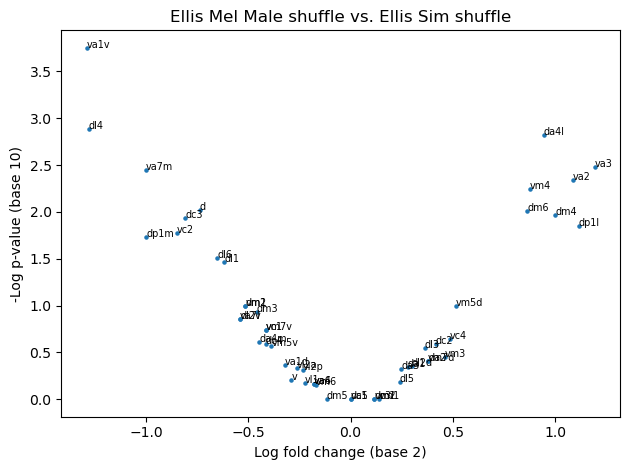

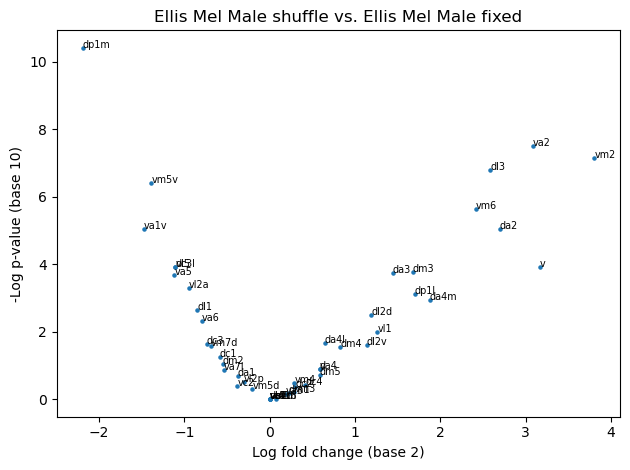

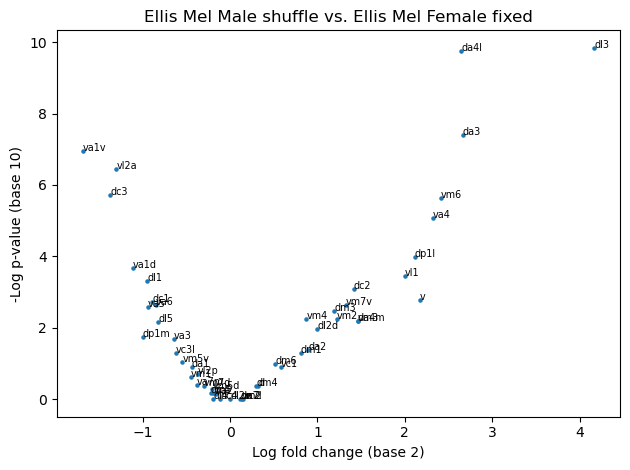

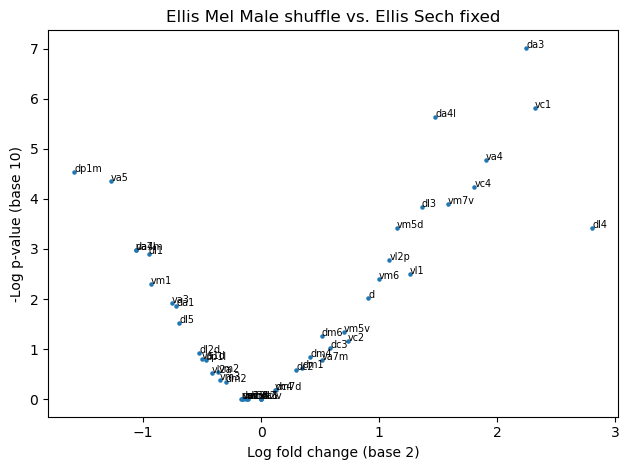

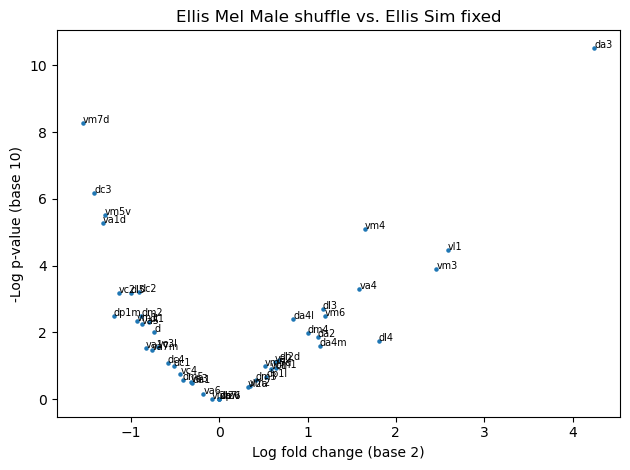

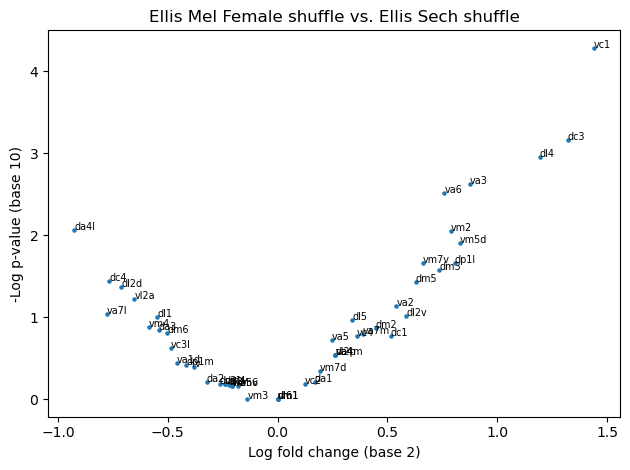

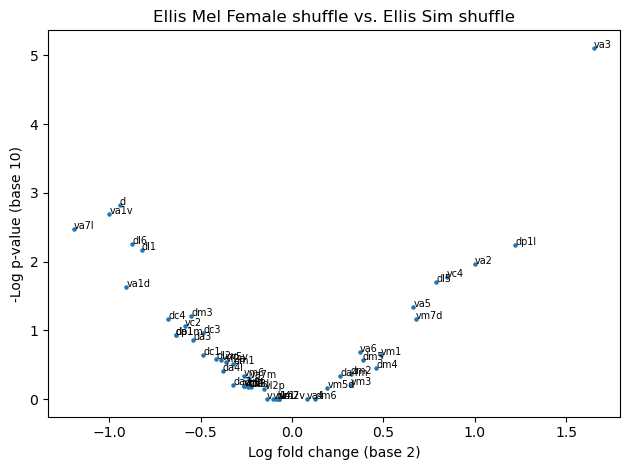

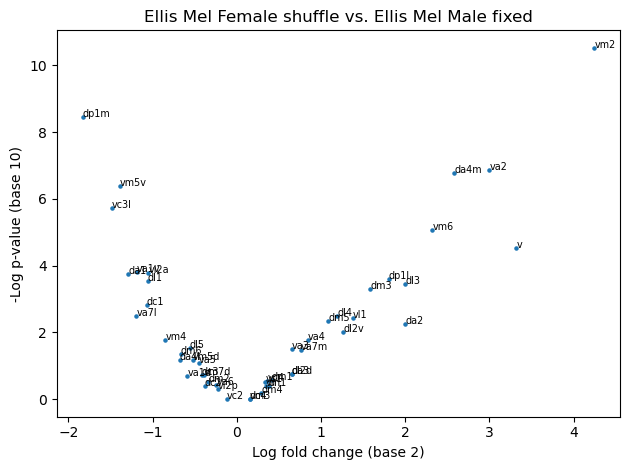

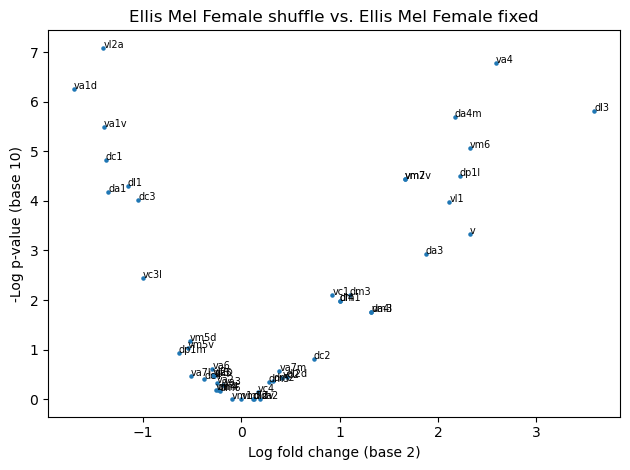

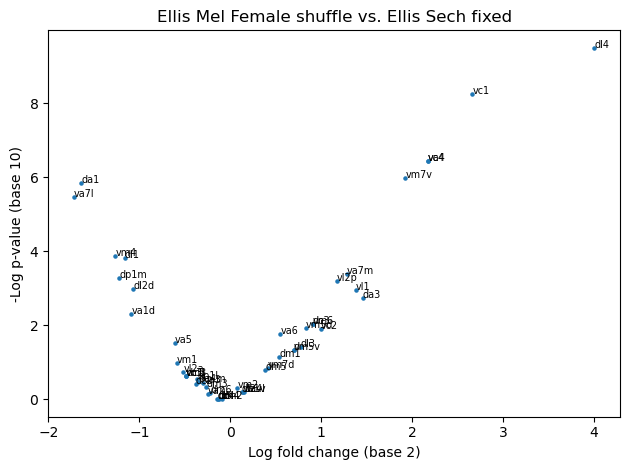

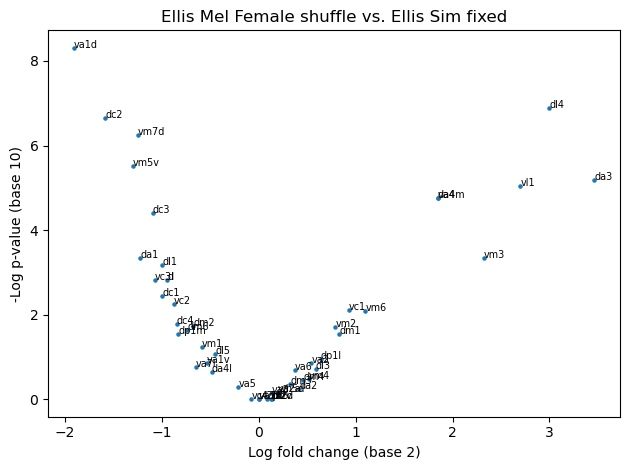

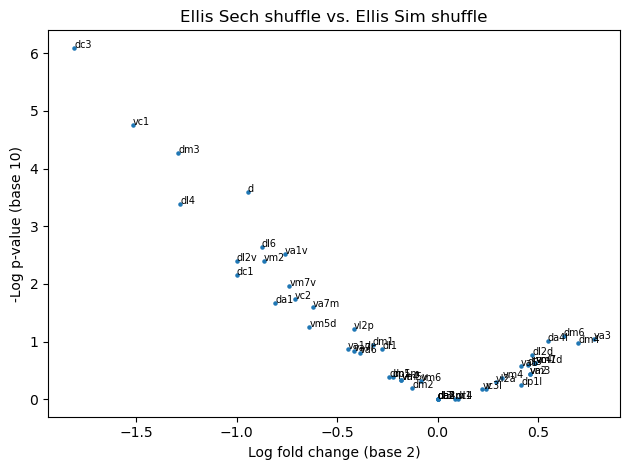

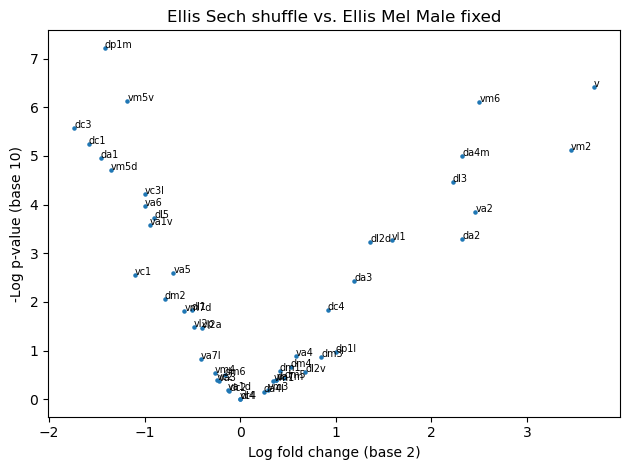

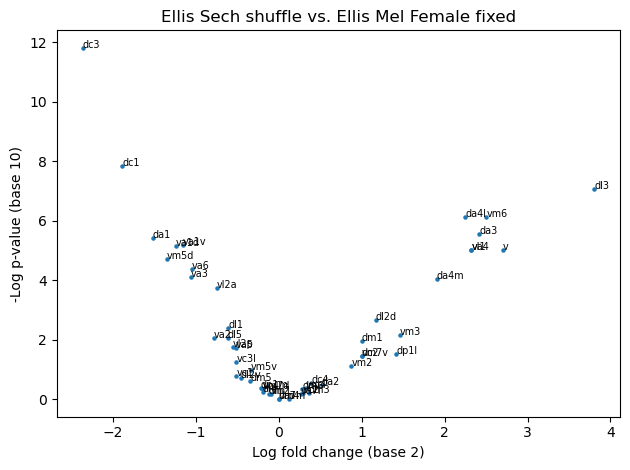

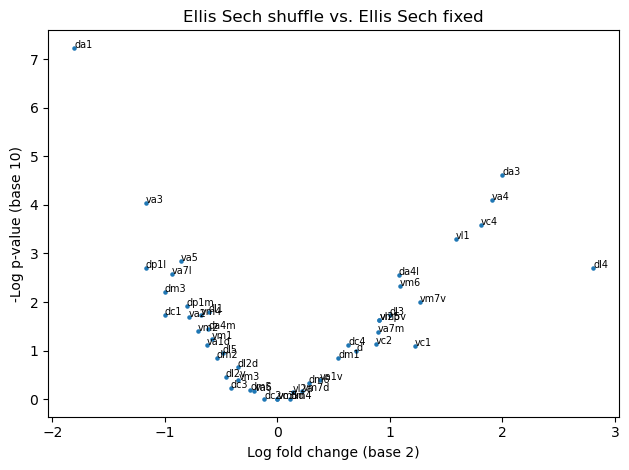

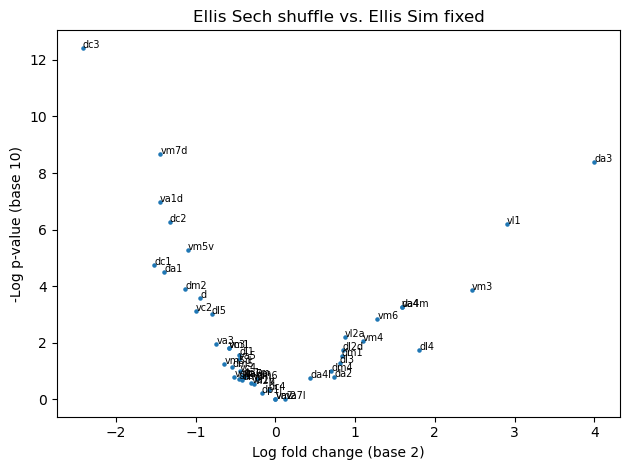

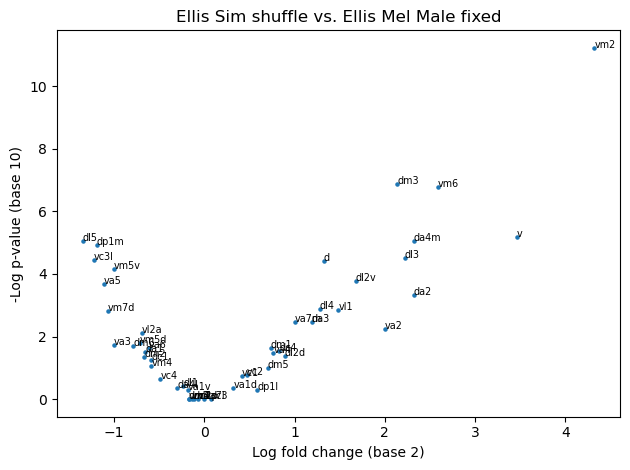

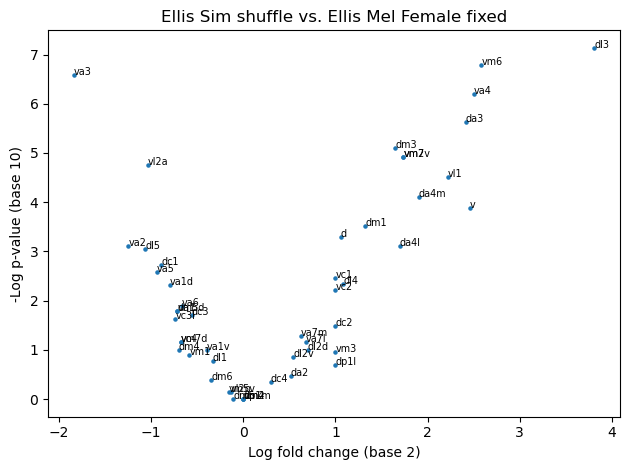

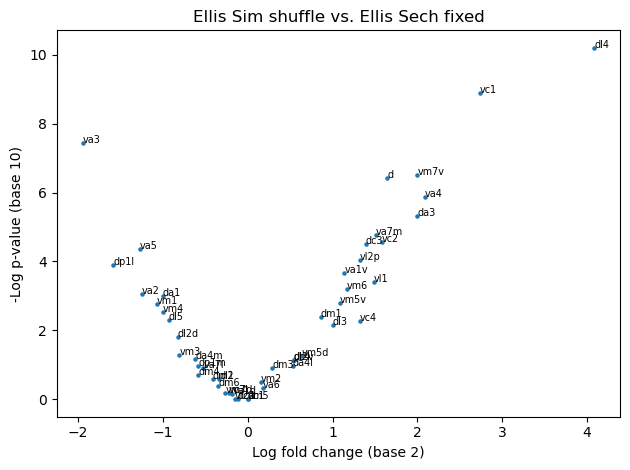

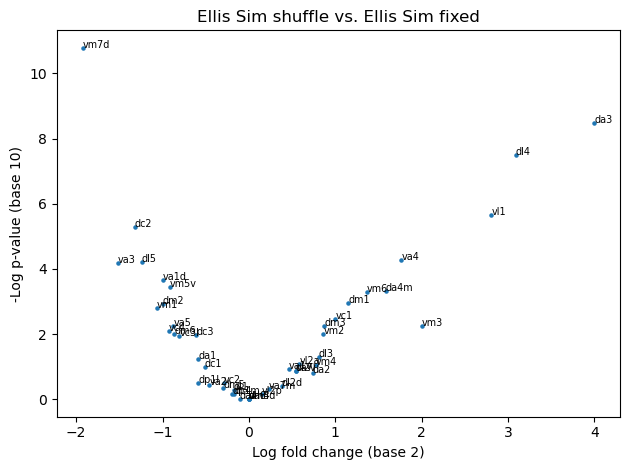

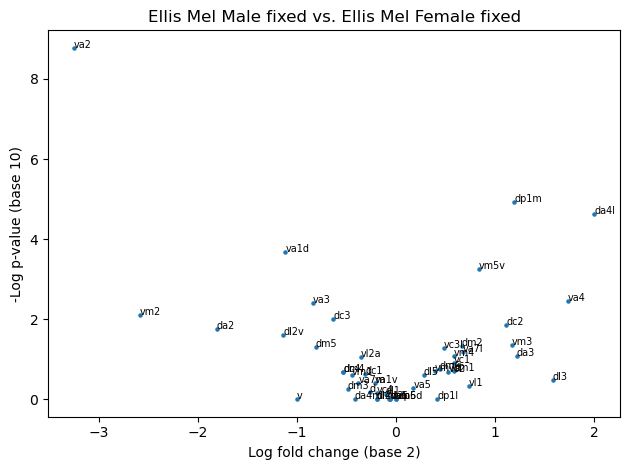

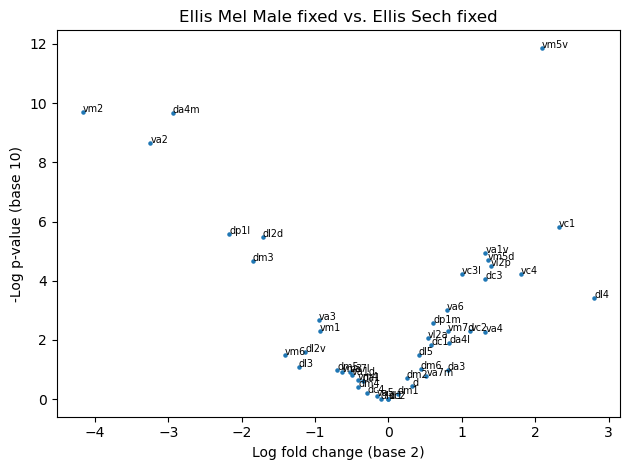

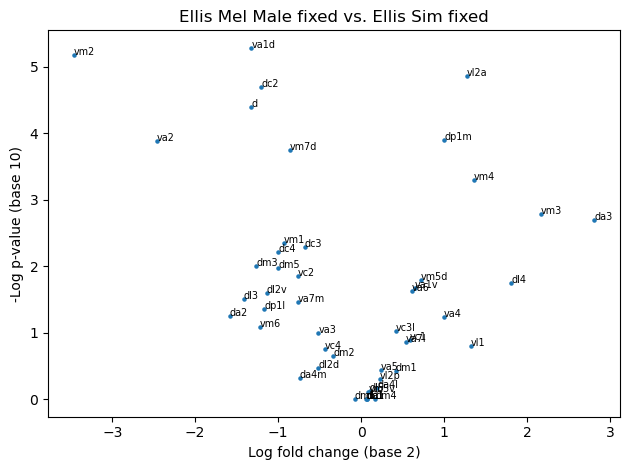

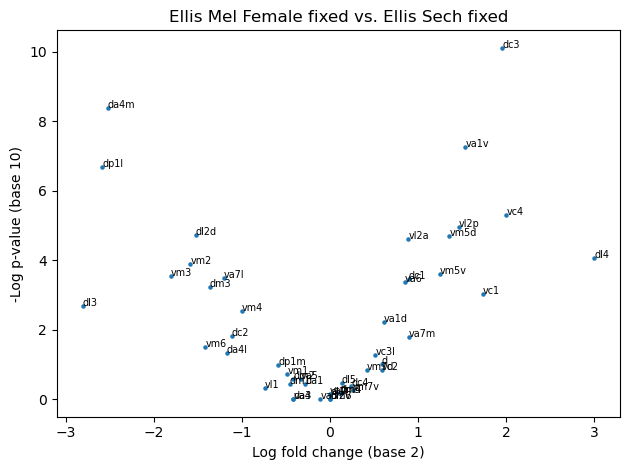

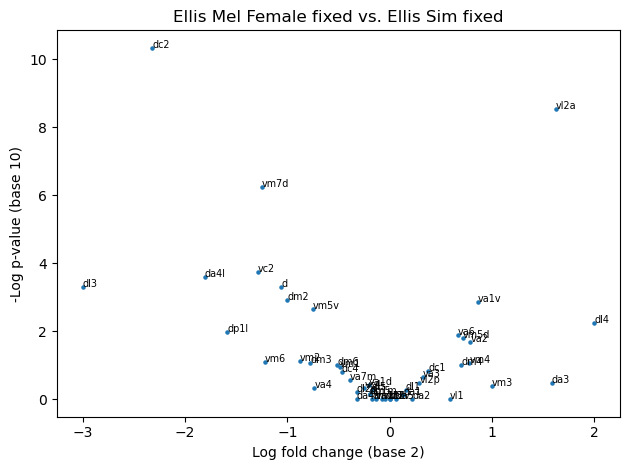

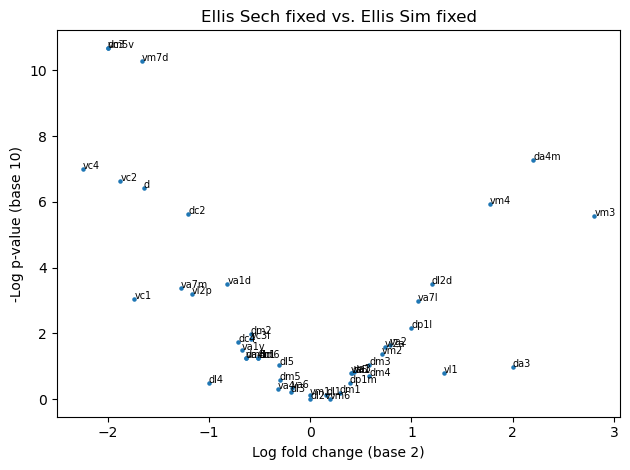

In [7]:
datasets = [W_Ellis_Mel_M, W_Ellis_Mel_F, W_Ellis_Sech, W_Ellis_Sim, W_Ellis_Mel_M_shuff, W_Ellis_Mel_F_shuff, W_Ellis_Sech_shuff, W_Ellis_Sim_shuff, W_Ellis_Mel_M_fixed, W_Ellis_Mel_F_fixed, W_Ellis_Sech_fixed, W_Ellis_Sim_fixed]
sheetnames = ['Ellis Mel Male', 'Ellis Mel Female', 'Ellis Sech', 'Ellis Sim', 'Ellis Mel Male shuffle', 'Ellis Mel Female shuffle', 'Ellis Sech shuffle', 'Ellis Sim shuffle', 'Ellis Mel Male fixed', 'Ellis Mel Female fixed', 'Ellis Sech fixed', 'Ellis Sim fixed']

Nsheets = len(datasets)
Nglom = len(datasets[0].columns)

gloms = datasets[0].columns

Ja = list() # List of raw binary connectivity matrices

for dataset in datasets:
    Ja.append(np.array(dataset))

#all pairwise comparisons

Npair = math.ceil((Nsheets * (Nsheets-1))/2)

pvs = np.zeros([Npair,Nglom])
ratio = np.zeros([Npair,Nglom])
comparisons = np.zeros([Npair,Nglom],dtype=object)
icount = 0
sia = np.zeros(Npair,dtype=int)
sja = np.zeros(Npair,dtype=int)

for si in range(Nsheets-1):
    print(si)
    Nkci = Ja[si].shape[0]
    for sj in range((si+1),Nsheets):
        #if si == 1: #skip Dmel males vs. Dsec females and Dsim females
         #   continue
        sia[icount] = si
        sja[icount] = sj

        Nkcj = Ja[sj].shape[0]

        for gi in range(Nglom):
            connsi = np.sum(Ja[si][:,gi])
            connsj = np.sum(Ja[sj][:,gi])
            table = np.array([[connsi, connsj],[Nkci-connsi,Nkcj-connsj]])
            out,pvs[icount,gi] = fisher_exact(table)
            if connsj > 0:
                ratio[icount,gi] = connsi/connsj

            comparisons[icount,gi] = sheetnames[si]+" vs. "+sheetnames[sj]+" "+str(gloms[gi])

        icount = icount+1

###
#determine significant p-values using Benjamini-Hochberg procedure to control false discovery rate

Ncomparisons = len(pvs.flatten())
slope = 0.1/Ncomparisons #10% false discovery rate

sortinds = np.argsort(pvs,axis=None)
pvsflat = pvs.flatten()
ratioflat = ratio.flatten()

pvsort = pvsflat[sortinds]
k = 1+np.arange(Ncomparisons)

diff = pvsort-(slope*k)

Nvalid = np.where(diff > 0)[0][0]


for ii in range(Nvalid):
    ind = np.unravel_index(sortinds[ii],pvs.shape)
    si = sia[ind[0]]
    sj = sja[ind[0]]
    glom = gloms[ind[1]]
    pv = pvs[ind]

    print(sheetnames[si],"vs.",sheetnames[sj],glom,"p-value",pv)

df = pd.DataFrame(data={"comparison":comparisons.flatten(), "ratio":ratioflat, "p-value": pvsflat, "Log fold change (base 2)":np.log2(ratioflat), "-Log p-value (base 10)":np.abs(np.log(pvsflat))})

df.to_csv("volcano.csv")

plt.scatter(np.log2(ratioflat),np.abs(np.log(pvsflat)),s=5)
plt.xlabel("Log fold change (base 2)")
plt.ylabel("-Log p-value (base 10)")
plt.tight_layout()
plt.show()
plt.savefig("volcano.pdf")

for icount in range(Npair):
    fig, ax = plt.subplots()
    plt.scatter(np.log2(ratio[icount,:]),np.abs(np.log(pvs[icount,:])),s=5)
    plt.xlabel("Log fold change (base 2)")
    plt.ylabel("-Log p-value (base 10)")
    plt.title(comparisons[icount,0][:-2])
    plt.tight_layout()
    fname = "volcano_"+str(icount+1)+".pdf"
    for i, txt in enumerate(gloms):
        ax.annotate(txt, (np.log2(ratio[icount,:])[i], np.abs(np.log(pvs[icount,:]))[i]), fontsize='x-small')
    plt.savefig(fname)
    plt.show()